# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [27]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df.columns = [col_formatting(col) for col in df.columns]


In [28]:
# Your code here - Define the target and predictors
x_cols = df[df.drop('list_price',axis = 1).columns.to_list()]

outcome = 'list_price'


In [29]:
# Your code here - Split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [30]:
# Your code here - Fit the actual model

from statsmodels.formula.api import ols

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     567.3
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:38:14   Log-Likelihood:                -40383.
No. Observations:                8152   AIC:                         8.096e+04
Df Residuals:                    8057   BIC:                         8.162e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.1775      1.940     33.082      0.000      60.375      67.980
piece_count                                         78.2594      0.875     89.404      0.000      76.544      79.975
num_reviews                                          7.0105      0.669     10.475      0.000       5.699       8.322
play_star_rating                                     4.9045      0.629      7.796      0.000       3.671       6.138
star_rating                                         -1.3324      0.700     -1.904      0.057      -2.704       0.039
val_star_rating                                     -8.0965      0.629    -12.879      0.000      -9.329      -6.864
ages_10plus                                        119.2152      6.803     17.524      0.000     105.879     132.551
ages_10_14                                         -18.9912      9.354     -2.030      0.042     -37.327      -0.655
ages_10_16                                         -13.2165      4.055     -3.260      0.001     -21.165      -5.268
ages_10_21                                          51.9113      7.580      6.849      0.000      37.053      66.769
ages_11_16                                         -11.7875      5.934     -1.986      0.047     -23.419      -0.156
ages_12plus                                         63.0619      5.416     11.644      0.000      52.446      73.678
ages_12_16                                         -65.3874      6.776     -9.649      0.000     -78.671     -52.104
ages_14plus                                         16.2134      4.103      3.951      0.000       8.170      24.257
ages_16plus                                         25.5779      6.002      4.261      0.000      13.812      37.344
ages_1half_3                                        -9.0980      2.380     -3.823      0.000     -13.764      -4.433
ages_1half_5                                        -2.9836      3.003     -0.993      0.321      -8.871       2.904
ages_2_5                                            16.2664      1.673      9.720      0.000      12.986      19.547
ages_4plus                                         -19.5476      6.384     -3.062      0.002     -32.063      -7.033
ages_4_7                                            -6.4202      3.475     -1.848      0.065     -13.232       0.391
ages_4_99                                           -2.0668      3.635     -0.569      0.570      -9.192       5.059
ages_5plus                                          -8.5041      3.238     -2.627      0.009     -14.851      -2.158
ages_5_12                                          -32.5850      3.198    -10.189      0.000     -38.854     -26.316
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [31]:
# Your code here - Remove features which do not appear to be statistically relevant

summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 72
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.1775,1.940,33.082,0.000,60.375,67.980
piece_count,78.2594,0.875,89.404,0.000,76.544,79.975
num_reviews,7.0105,0.669,10.475,0.000,5.699,8.322
play_star_rating,4.9045,0.629,7.796,0.000,3.671,6.138
star_rating,-1.3324,0.700,-1.904,0.057,-2.704,0.039


In [32]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     750.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:49:50   Log-Likelihood:                -40395.
No. Observations:                8152   AIC:                         8.093e+04
Df Residuals:                    8080   BIC:                         8.144e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.8848      1.610     39.678      0.000      60.729      67.041
piece_count                                         78.4017      0.855     91.718      0.000      76.726      80.077
num_reviews                                          7.0202      0.657     10.690      0.000       5.733       8.308
play_star_rating                                     4.3992      0.529      8.317      0.000       3.362       5.436
val_star_rating                                     -8.6902      0.495    -17.567      0.000      -9.660      -7.720
ages_10plus                                        113.6054      4.699     24.179      0.000     104.395     122.816
ages_10_14                                         -16.2780      9.688     -1.680      0.093     -35.270       2.713
ages_10_16                                         -10.5784      3.849     -2.748      0.006     -18.123      -3.033
ages_10_21                                          43.8345      3.214     13.638      0.000      37.534      50.135
ages_11_16                                          -9.2677      5.733     -1.617      0.106     -20.506       1.970
ages_12plus                                         62.8145      5.889     10.666      0.000      51.270      74.359
ages_12_16                                         -62.8629      7.073     -8.887      0.000     -76.728     -48.998
ages_14plus                                         18.3193      4.658      3.933      0.000       9.189      27.450
ages_16plus                                         26.5611      6.649      3.995      0.000      13.527      39.595
ages_1half_3                                        -5.8016      4.696     -1.235      0.217     -15.008       3.405
ages_2_5                                            19.1788      4.076      4.705      0.000      11.188      27.169
ages_4plus                                         -19.1066      9.725     -1.965      0.049     -38.171      -0.043
ages_5plus                                          -7.4604      3.180     -2.346      0.019     -13.694      -1.227
ages_5_12                                          -28.1176      2.670    -10.531      0.000     -33.351     -22.884
ages_6plus                                         -22.0074      5.770     -3.814      0.000     -33.317     -10.697
ages_6_12                                          -15.2400      1.907     -7.993      0.000     -18.977     -11.502
ages_7_12                                          -14.6276      2.207     -6.626      0.000     -18.955     -10.300
ages_7_14                                          -11.0373      1.972     -5.598      0.000     -14.902      -7.172
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [33]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

73 63
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.8848,1.610,39.678,0.0,60.729,67.041
piece_count,78.4017,0.855,91.718,0.0,76.726,80.077
num_reviews,7.0202,0.657,10.690,0.0,5.733,8.308
play_star_rating,4.3992,0.529,8.317,0.0,3.362,5.436
val_star_rating,-8.6902,0.495,-17.567,0.0,-9.660,-7.720


In [34]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     858.2
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:54:06   Log-Likelihood:                -40405.
No. Observations:                8152   AIC:                         8.094e+04
Df Residuals:                    8089   BIC:                         8.138e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.3210      1.307     49.195      0.000      61.758      66.884
piece_count                                         78.0136      0.804     97.087      0.000      76.438      79.589
num_reviews                                          6.9868      0.655     10.675      0.000       5.704       8.270
play_star_rating                                     4.5093      0.527      8.564      0.000       3.477       5.541
val_star_rating                                     -8.7008      0.494    -17.620      0.000      -9.669      -7.733
ages_10plus                                        115.0089      4.611     24.941      0.000     105.970     124.048
ages_10_16                                          -9.0541      3.700     -2.447      0.014     -16.307      -1.802
ages_10_21                                          44.1753      3.119     14.163      0.000      38.061      50.289
ages_12plus                                         65.4180      5.735     11.406      0.000      54.175      76.661
ages_12_16                                         -59.8154      6.902     -8.667      0.000     -73.344     -46.286
ages_14plus                                         21.7574      4.401      4.944      0.000      13.130      30.385
ages_16plus                                         31.0770      6.261      4.963      0.000      18.803      43.351
ages_2_5                                            23.6315      1.843     12.823      0.000      20.019      27.244
ages_4plus                                         -18.8881      9.730     -1.941      0.052     -37.961       0.185
ages_5plus                                          -7.2627      3.157     -2.301      0.021     -13.450      -1.075
ages_5_12                                          -26.8228      2.537    -10.572      0.000     -31.796     -21.849
ages_6plus                                         -20.8755      5.717     -3.652      0.000     -32.082      -9.669
ages_6_12                                          -13.5536      1.689     -8.025      0.000     -16.864     -10.243
ages_7_12                                          -13.6995      2.046     -6.697      0.000     -17.709      -9.690
ages_7_14                                           -9.7581      1.796     -5.432      0.000     -13.280      -6.237
ages_8plus                                          15.0630      4.401      3.423      0.001       6.436      23.690
ages_8_12                                          -14.5255      2.592     -5.604      0.000     -19.607      -9.444
ages_8_14                                           -8.6687      1.931     -4.489      0.000     -12.454      -4.883
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [35]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/home/khan/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.111760046061168),
 ('num_reviews', 2.8756019795750642),
 ('play_star_rating', 1.7907160965326743),
 ('val_star_rating', 1.6062221010001767),
 ('ages_10plus', 7.155501058858494),
 ('ages_10_16', 1.1610395603512915),
 ('ages_10_21', 1.056421380900432),
 ('ages_12plus', 6.135155088062405),
 ('ages_12_16', 1.1797150505959968),
 ('ages_14plus', 2.133969279763413),
 ('ages_16plus', 8.920017569429495),
 ('ages_2_5', 1.2040405128205958),
 ('ages_4plus', 1.197390738378655),
 ('ages_5plus', inf),
 ('ages_5_12', 3.155456296629816),
 ('ages_6plus', 2.662595833013444),
 ('ages_6_12', 1.830331453527828),
 ('ages_7_12', 1.4825800688716497),
 ('ages_7_14', 1.899805353346407),
 ('ages_8plus', 2.5845901377166838),
 ('ages_8_12', 1.2728257448898164),
 ('ages_8_14', 1.9874426973612724),
 ('ages_9plus', 1.407676554420118),
 ('ages_9_12', 1.019488050962058),
 ('ages_9_14', 1.8325394343024024),
 ('theme_name_Architecture', 5.175648452712575),
 ('theme_name_BOOST', 1.0600296746447218),
 ('t

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [36]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

63 56


In [37]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     859.4
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:57:45   Log-Likelihood:                -40760.
No. Observations:                8152   AIC:                         8.163e+04
Df Residuals:                    8095   BIC:                         8.203e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.6576      1.121     58.565      0.000      63.460      67.855
piece_count                                         79.2758      0.655    120.977      0.000      77.991      80.560
num_reviews                                          5.3474      0.636      8.405      0.000       4.100       6.595
play_star_rating                                     5.6847      0.497     11.441      0.000       4.711       6.659
val_star_rating                                    -10.4282      0.492    -21.186      0.000     -11.393      -9.463
ages_10_16                                         -15.1114      3.657     -4.132      0.000     -22.281      -7.942
ages_10_21                                          42.0475      3.200     13.139      0.000      35.774      48.321
ages_12_16                                         -70.7010      6.820    -10.367      0.000     -84.070     -57.332
ages_14plus                                          2.6023      3.824      0.681      0.496      -4.893      10.098
ages_2_5                                            22.1449      1.802     12.286      0.000      18.612      25.678
ages_4plus                                          -9.0861     10.102     -0.899      0.368     -28.888      10.716
ages_5_12                                          -29.5071      2.564    -11.506      0.000     -34.534     -24.480
ages_6plus                                         -24.0876      5.926     -4.065      0.000     -35.703     -12.472
ages_6_12                                          -17.7264      1.604    -11.052      0.000     -20.871     -14.582
ages_7_12                                          -17.0463      2.011     -8.475      0.000     -20.989     -13.104
ages_7_14                                          -13.3630      1.741     -7.675      0.000     -16.776      -9.950
ages_8plus                                           2.7993      4.447      0.630      0.529      -5.917      11.516
ages_8_12                                          -18.1049      2.545     -7.115      0.000     -23.093     -13.117
ages_8_14                                          -14.2745      1.850     -7.716      0.000     -17.901     -10.648
ages_9plus                                          24.1141     10.361      2.327      0.020       3.804      44.424
ages_9_12                                          -28.3932      6.486     -4.377      0.000     -41.108     -15.679
ages_9_14                                          -12.7619      2.526     -5.052      0.000     -17.714      -7.810
theme_name_BOOST                                    87.2269      9.574      9.111      0.000      68.459     105.995
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

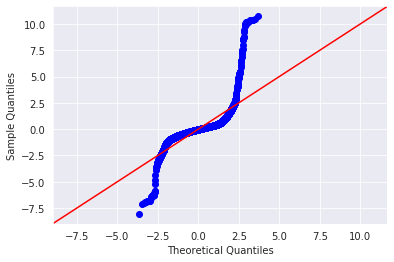

In [38]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

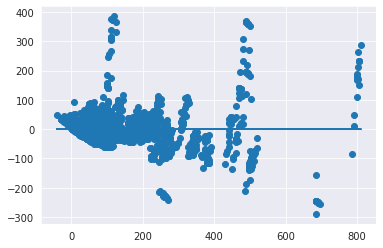

In [39]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [41]:
# Your code here - Check for outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


In [40]:
# Your code here
# Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

# Rerun the model

Percent removed: 0.010487580496780129


/home/khan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     468.0
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:05:04   Log-Likelihood:                -4725.1
No. Observations:                8067   AIC:                             9564.
Df Residuals:                    8010   BIC:                             9963.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3483      0.014    245.647      0.000       3.322       3.375
piece_count                                          0.6001      0.009     63.814      0.000       0.582       0.619
num_reviews                                          0.0151      0.008      1.910      0.056      -0.000       0.031
play_star_rating                                     0.0916      0.006     15.434      0.000       0.080       0.103
val_star_rating                                     -0.1438      0.006    -24.133      0.000      -0.155      -0.132
ages_10_16                                           0.6419      0.045     14.368      0.000       0.554       0.729
ages_10_21                                           0.7086      0.040     17.654      0.000       0.630       0.787
ages_12_16                                           0.0199      0.077      0.258      0.796      -0.131       0.171
ages_14plus                                          0.3922      0.050      7.808      0.000       0.294       0.491
ages_2_5                                             0.5371      0.022     24.402      0.000       0.494       0.580
ages_4plus                                          -1.4233      0.126    -11.273      0.000      -1.671      -1.176
ages_5_12                                           -0.6443      0.031    -20.503      0.000      -0.706      -0.583
ages_6plus                                          -0.8575      0.066    -12.940      0.000      -0.987      -0.728
ages_6_12                                           -0.0572      0.019     -2.967      0.003      -0.095      -0.019
ages_7_12                                            0.1920      0.024      7.858      0.000       0.144       0.240
ages_7_14                                            0.0819      0.021      3.867      0.000       0.040       0.123
ages_8plus                                           0.5904      0.055     10.777      0.000       0.483       0.698
ages_8_12                                            0.3395      0.031     10.905      0.000       0.278       0.401
ages_8_14                                            0.4175      0.022     18.652      0.000       0.374       0.461
ages_9plus                                           0.2600      0.119      2.194      0.028       0.028       0.492
ages_9_12                                            0.4423      0.082      5.364      0.000       0.281       0.604
ages_9_14                                            0.5960      0.031     19.514      0.000       0.536       0.656
theme_name_BOOST                                     0.9995      0.112      8.885      0.000       0.779       1.220
theme_name_Blues_Helicopter_Pursuit      

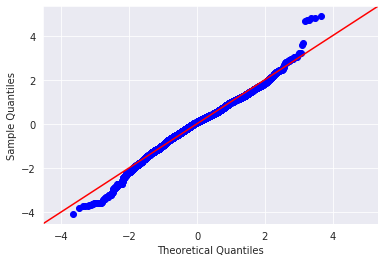

In [42]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

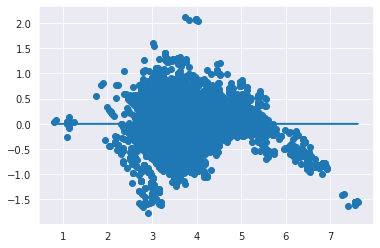

In [43]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 